In [12]:
#library imports
import pandas as pd
import scipy as sp
import numpy as np
import graphviz as gv
import matplotlib as mp
import statistics as stats
import sklearn as skl


In [13]:
from numpy import NaN


dataset_wide = pd.read_csv('dataset_wide.csv', header = 0)
df = pd.DataFrame(dataset_wide)[['Birth Year', 'Height [in]']] # first half creates data frame and brackets part chooses columns

In [5]:
for row in range(len(df)):
   if type(df.iloc[row]['Height [in]']) != float:
      df.iloc[row]['Height [in]'] = np.nan

df = df.dropna()

C:\Users\andrew\AppData\Local\Temp\ipykernel_27588\1702252796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[row]['Height [in]'] = np.nan


C:\Users\andrew\AppData\Local\Temp\ipykernel_27588\650830261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[row]['Prediction - Sparta Score'] = np.nan
c:\Users\andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:xlabel='Jump Height (in)', ylabel='Prediction - Sparta Score'>

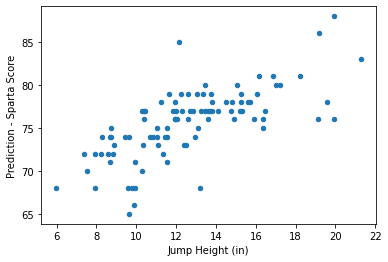

In [58]:
df2 = pd.DataFrame(dataset_wide)[['Prediction - Sparta Score', 'Jump Height (in)']]

# train correlation between sparta score and injury risk using short dataset, then test on long
# (1) create an algorithm to turn t-scores into sparta scores using long
# refine injury risk to be better than low, mid, high

for row in range(len(df2)):
    if type(df2.iloc[row]['Prediction - Sparta Score']) != float or type(df2.iloc[row]['Jump Height (in)']) != float:
        df.iloc[row]['Prediction - Sparta Score'] = np.nan
df2.dropna()
df2.plot.scatter(y = 'Prediction - Sparta Score', x = 'Jump Height (in)')


<AxesSubplot:xlabel='height/weight ratio', ylabel='Prediction - Sparta Score'>

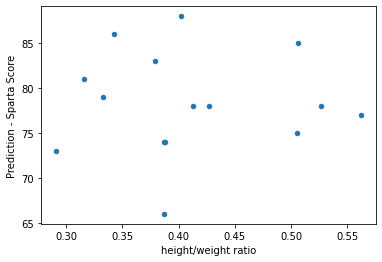

In [61]:
#graph that compares ratio of height/weight to sparta score

df3 = pd.DataFrame(dataset_wide)[['Prediction - Sparta Score', 'Height [in]', 'General - Body Mass (Lb)']]

count = 0

for row in range(len(df3)):
    cell = df3.iloc[row]['Prediction - Sparta Score']
    
    if type(cell) != float:
       cell = NaN

df43 = df3.dropna()

#creates a new column call height/weight ratio
ratio = []
for row in range(len(df3)):
    ratio.append((df3.iloc[row]['Height [in]']) / (df3.iloc[row]['General - Body Mass (Lb)']))

#adding new column to dataframe
df3['height/weight ratio'] = ratio

df3.plot.scatter(y = 'Prediction - Sparta Score', x = 'height/weight ratio')

In [8]:
df.dropna()

,Birth Year,Height [in]
0,1977,66.0
1,1977,66.0
2,1977,66.0
3,1977,66.0
4,1977,66.0
24,2007,73.0
34,2008,61.0
36,2008,67.0
63,2008,64.0
92,1988,65.0


0.1680227557565431
0.3132845825905835


<AxesSubplot:xlabel='Birth Year', ylabel='Height [in]'>

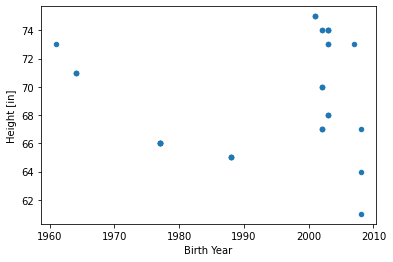

In [9]:
rho, pstat = sp.stats.pearsonr(df['Birth Year'], df['Height [in]'])
print(rho)
print(pstat)
df.plot.scatter(y = 'Height [in]', x = 'Birth Year')